In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rail_station = pd.read_csv(".\\Washington Metropolitan Area Transit Authority\\wmata_train_predictions\\rail_station.csv")
rail_stop_sequence = pd.read_csv(".\\Washington Metropolitan Area Transit Authority\\wmata_train_predictions\\rail_stop_sequence.csv")
train_arrival = pd.read_csv(".\\Washington Metropolitan Area Transit Authority\\wmata_train_predictions\\train_arrivals.csv")
train_pred = pd.read_csv(".\\Washington Metropolitan Area Transit Authority\\wmata_train_predictions\\train_predictions.csv")

In [4]:
rail_station.head()

,ID,PRIMARY_NAME
0,MSTN_003,Benning Road
1,MSTN_004,Brookland-CUA
2,MSTN_007,Columbia Heights
3,MSTN_010,Dupont Circle
4,MSTN_011,Eastern Market


In [5]:
rail_stop_sequence.head()

,DIRECTION,TRACK,PATTERN,STOP_SEQ_NUM,STOP_ID,STATION_ID
0,1,1,Blue,27,G05,MSTN_085
1,1,1,Blue,26,G04,MSTN_086
2,1,1,Blue,25,G03,MSTN_062
3,1,1,Blue,24,G02,MSTN_084
4,1,1,Blue,23,G01,MSTN_003


In [6]:
train_arrival.head()

,PLATFORM,ARRIVALTIME,STATION_ID,PLATFORM_NUMBER,UNIQUE_TRAIN_INDEX,TRAIN_NUMBER
0,A01-1,20190122 05:35:48,A01,1,245,113
1,A01-1,20190122 05:36:50,A01,1,307,0
2,A01-1,20190122 05:44:22,A01,1,255,101
3,A01-1,20190122 05:51:59,A01,1,263,122
4,A01-1,20190122 05:58:27,A01,1,277,152


In [7]:
from datetime import datetime
train_arrival['ARRIVALTIME'] = train_arrival['ARRIVALTIME'].apply(lambda x: \
    datetime.strptime(x,"%Y%m%d %H:%M:%S"))

train_arrival["DATE"] = [d.date() for d in train_arrival['ARRIVALTIME']]
train_arrival["TIME"] = [d.time() for d in train_arrival['ARRIVALTIME']]

In [8]:
train_arrival.head()

,PLATFORM,ARRIVALTIME,STATION_ID,PLATFORM_NUMBER,UNIQUE_TRAIN_INDEX,TRAIN_NUMBER,DATE,TIME
0,A01-1,2019-01-22 05:35:48,A01,1,245,113,2019-01-22,05:35:48
1,A01-1,2019-01-22 05:36:50,A01,1,307,0,2019-01-22,05:36:50
2,A01-1,2019-01-22 05:44:22,A01,1,255,101,2019-01-22,05:44:22
3,A01-1,2019-01-22 05:51:59,A01,1,263,122,2019-01-22,05:51:59
4,A01-1,2019-01-22 05:58:27,A01,1,277,152,2019-01-22,05:58:27


In [9]:
train_arrival.DATE.unique()

array([datetime.date(2019, 1, 22), datetime.date(2019, 1, 23),
       datetime.date(2019, 1, 24), datetime.date(2019, 1, 25),
       datetime.date(2019, 1, 26), datetime.date(2019, 1, 27),
       datetime.date(2019, 1, 28)], dtype=object)

In [30]:
train_pred.head()

,PREDICTION_DTM,STATION_ID,PLATFORM_NUMBER,LINE_CODE,IS_REVENUE,IS_FROM_SCHEDULE,UNIQUE_TRAIN_INDEX,TRAIN_NUMBER,ETA
0,20190122 04:37:11,A01,1,NaN,0,0,230,000,2125
1,20190122 04:38:11,A01,1,NaN,0,0,230,000,2063
2,20190122 04:39:12,A01,1,NaN,0,0,230,000,2063
3,20190122 04:40:13,A01,1,NaN,0,0,230,000,2063
4,20190122 04:41:14,A01,1,NaN,0,0,230,000,2045


In [10]:
train_pred['PREDICTION_DTM'] = train_pred.PREDICTION_DTM.astype(str)
train_pred['PREDICTION_DTM'] = train_pred['PREDICTION_DTM'].apply(lambda x: datetime.strptime(x,"%Y%m%d %H:%M:%S"))

train_pred["DATE"] = [d.date() for d in train_pred['PREDICTION_DTM']]
train_pred["TIME"] = [d.time() for d in train_pred['PREDICTION_DTM']]
train_pred["ESTIMATE"] = pd.to_datetime(train_pred['PREDICTION_DTM']) + pd.to_timedelta(train_pred['ETA'], unit='s')
train_pred["ESTIMATETIME"] = [d.time() for d in train_pred['ESTIMATE']]

In [11]:
len(train_pred)

11989981

In [12]:
train_pred.DATE.unique()

array([datetime.date(2019, 1, 22), datetime.date(2019, 1, 23),
       datetime.date(2019, 1, 24), datetime.date(2019, 1, 25),
       datetime.date(2019, 1, 26), datetime.date(2019, 1, 27),
       datetime.date(2019, 1, 28), datetime.date(2019, 1, 29)],
      dtype=object)

In [13]:
unique_ids = train_arrival.UNIQUE_TRAIN_INDEX.unique()
print(len(unique_ids))

494


In [14]:
train_pred.LINE_CODE.unique()

array([nan, 'RD', 'YL', 'SV', 'BL', 'OR', 'GR'], dtype=object)

### Concatinating these two files for tableau interactive plots

In [15]:
arrival = pd.DataFrame()
pred = pd.DataFrame()
arrival['STATION_ID'] = train_arrival['STATION_ID']
pred['STATION_ID'] = train_pred['STATION_ID']
arrival['UNIQUE_TRAIN_INDEX'] = train_arrival['UNIQUE_TRAIN_INDEX']
pred['UNIQUE_TRAIN_INDEX'] = train_pred['UNIQUE_TRAIN_INDEX']
arrival['DATE'] = train_arrival['DATE']
pred['DATE'] = train_pred['DATE']
arrival['TIME'] = train_arrival['TIME']
pred['TIME'] = train_pred['ESTIMATETIME']
arrival['PLATFORM_NUMBER'] = train_arrival['PLATFORM_NUMBER']
pred['PLATFORM_NUMBER'] = train_pred['PLATFORM_NUMBER']
arrival['IS_REVENUE'] = 1
pred['IS_REVENUE'] = train_pred['IS_REVENUE']
pred['IS_SCHEDULE'] = train_pred['IS_FROM_SCHEDULE']
arrival['IS_SCHEDULE'] = 0
pred['PREDICTION_TIME'] = train_pred['PREDICTION_DTM']
arrival['PREDICTION_TIME'] = np.nan
pred['IS_PRED'] = 1
arrival['IS_PRED'] = 0

In [16]:
pred['LINE_CODE'] = train_pred['LINE_CODE']
pred.loc[pred['LINE_CODE'] == 'RD', 'IS_RD'] = 1
pred.loc[pred['LINE_CODE'] == 'YL', 'IS_YL'] = 1
pred.loc[pred['LINE_CODE'] == 'SV', 'IS_SL'] = 1
pred.loc[pred['LINE_CODE'] == 'BL', 'IS_BL'] = 1
pred.loc[pred['LINE_CODE'] == 'OR', 'IS_OR'] = 1
pred.loc[pred['LINE_CODE'] == 'GR', 'IS_GR'] = 1
arrival['IS_RD'] = 1
arrival['IS_YL'] = 1
arrival['IS_SL'] = 1
arrival['IS_BL'] = 1
arrival['IS_OR'] = 1
arrival['IS_GR'] = 1
pred = pred.drop(columns=['LINE_CODE'])

In [17]:
pred.head()

,STATION_ID,UNIQUE_TRAIN_INDEX,DATE,TIME,PLATFORM_NUMBER,IS_REVENUE,IS_SCHEDULE,PREDICTION_TIME,IS_PRED,IS_RD,IS_YL,IS_SL,IS_BL,IS_OR,IS_GR
0,A01,230,2019-01-22,05:12:36,1,0,0,2019-01-22 04:37:11,1,NaN,NaN,NaN,NaN,NaN,NaN
1,A01,230,2019-01-22,05:12:34,1,0,0,2019-01-22 04:38:11,1,NaN,NaN,NaN,NaN,NaN,NaN
2,A01,230,2019-01-22,05:13:35,1,0,0,2019-01-22 04:39:12,1,NaN,NaN,NaN,NaN,NaN,NaN
3,A01,230,2019-01-22,05:14:36,1,0,0,2019-01-22 04:40:13,1,NaN,NaN,NaN,NaN,NaN,NaN
4,A01,230,2019-01-22,05:15:19,1,0,0,2019-01-22 04:41:14,1,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
frames = [arrival, pred]
result = pd.concat(frames)
result.to_csv("arrival_pred.csv", index=False)

In [18]:
arrival.head()

,STATION_ID,UNIQUE_TRAIN_INDEX,DATE,TIME,PLATFORM_NUMBER,IS_REVENUE,IS_SCHEDULE,PREDICTION_TIME,IS_PRED,IS_RD,IS_YL,IS_SL,IS_BL,IS_OR,IS_GR
0,A01,245,2019-01-22,05:35:48,1,1,0,NaN,0,1,1,1,1,1,1
1,A01,307,2019-01-22,05:36:50,1,1,0,NaN,0,1,1,1,1,1,1
2,A01,255,2019-01-22,05:44:22,1,1,0,NaN,0,1,1,1,1,1,1
3,A01,263,2019-01-22,05:51:59,1,1,0,NaN,0,1,1,1,1,1,1
4,A01,277,2019-01-22,05:58:27,1,1,0,NaN,0,1,1,1,1,1,1


#### Taking a look at the closest predictions

In [19]:
def nearest(predictions, arr):
   return min(predictions, key=lambda x: abs(x - arr))

In [20]:
merged_data = pd.read_csv(".\\merged_data\\merged_data.csv")

In [21]:
merged_data.columns

Index(['Unnamed: 0', 'PREDICTION_DTM', 'STATION_ID_x', 'PLATFORM_NUMBER_x',
       'LINE_CODE', 'IS_REVENUE', 'IS_FROM_SCHEDULE', 'UNIQUE_TRAIN_INDEX_x',
       'TRAIN_NUMBER_x', 'ETA', 'New_ID', 'Hour_x', 'Day_x', 'PLATFORM',
       'ARRIVALTIME', 'STATION_ID_y', 'PLATFORM_NUMBER_y',
       'UNIQUE_TRAIN_INDEX_y', 'TRAIN_NUMBER_y', 'Hour_y', 'Day_y'],
      dtype='object')

In [22]:
merged_data['PREDICTION_DTM'] = merged_data['PREDICTION_DTM'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
merged_data['ARRIVALTIME'] = merged_data['ARRIVALTIME'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [ ]:
merged_data['Nearest_Pred'] = merged_data.apply(lambda row: nearest(merged_data[merged_data.New_ID == row.New_ID]['PREDICTION_DTM'], row.ARRIVALTIME), axis=1)

In [17]:
merged_data.to_csv("merged.csv", index=False)

#### Analyzing predictions for a single red line trip on 22nd jan 2019

In [23]:
train245_arrival = train_arrival[(train_arrival["UNIQUE_TRAIN_INDEX"] == 245) & (train_arrival["PLATFORM_NUMBER"] == 1)]

In [24]:
train245_arrival.sort_values(by='ARRIVALTIME').head()

,PLATFORM,ARRIVALTIME,STATION_ID,PLATFORM_NUMBER,UNIQUE_TRAIN_INDEX,TRAIN_NUMBER,DATE,TIME
26295,A13-1,2019-01-22 05:06:28,A13,1,245,113,2019-01-22,05:06:28
24145,A12-1,2019-01-22 05:08:48,A12,1,245,113,2019-01-22,05:08:48
21989,A11-1,2019-01-22 05:11:19,A11,1,245,113,2019-01-22,05:11:19
19832,A10-1,2019-01-22 05:14:46,A10,1,245,113,2019-01-22,05:14:46
17674,A09-1,2019-01-22 05:17:25,A09,1,245,113,2019-01-22,05:17:25


In [25]:
red_pred = train_pred[(train_pred["LINE_CODE"] == 'RD') & (train_pred["IS_REVENUE"])]

In [26]:
train245_pred = red_pred[(red_pred["UNIQUE_TRAIN_INDEX"] == str(245)) & (red_pred["PLATFORM_NUMBER"] == 1)]

In [27]:
train245_pred.sort_values(by='PREDICTION_DTM').head()

,PREDICTION_DTM,STATION_ID,PLATFORM_NUMBER,LINE_CODE,IS_REVENUE,IS_FROM_SCHEDULE,UNIQUE_TRAIN_INDEX,TRAIN_NUMBER,ETA,DATE,TIME,ESTIMATE,ESTIMATETIME
18,2019-01-22 04:53:26,A01,1,RD,1,0,245,113,2063,2019-01-22,04:53:26,2019-01-22 05:27:49,05:27:49
142507,2019-01-22 04:53:26,A02,1,RD,1,0,245,113,1938,2019-01-22,04:53:26,2019-01-22 05:25:44,05:25:44
2515438,2019-01-22 04:53:26,B05,1,RD,1,0,245,113,2797,2019-01-22,04:53:26,2019-01-22 05:40:03,05:40:03
2936265,2019-01-22 04:53:26,B08,1,RD,1,0,245,113,3300,2019-01-22,04:53:26,2019-01-22 05:48:26,05:48:26
2371732,2019-01-22 04:53:26,B04,1,RD,1,0,245,113,2661,2019-01-22,04:53:26,2019-01-22 05:37:47,05:37:47


In [31]:
train22 = train245_arrival[(train245_arrival['ARRIVALTIME'] > '2019-01-22') & (train245_arrival['ARRIVALTIME'] <= '2019-01-23')]

In [32]:
pred22 = train245_pred[(train245_pred['PREDICTION_DTM'] > '2019-01-22') & (train245_pred['PREDICTION_DTM'] <= '2019-01-23')]
len(pred22)

6098

## Plots

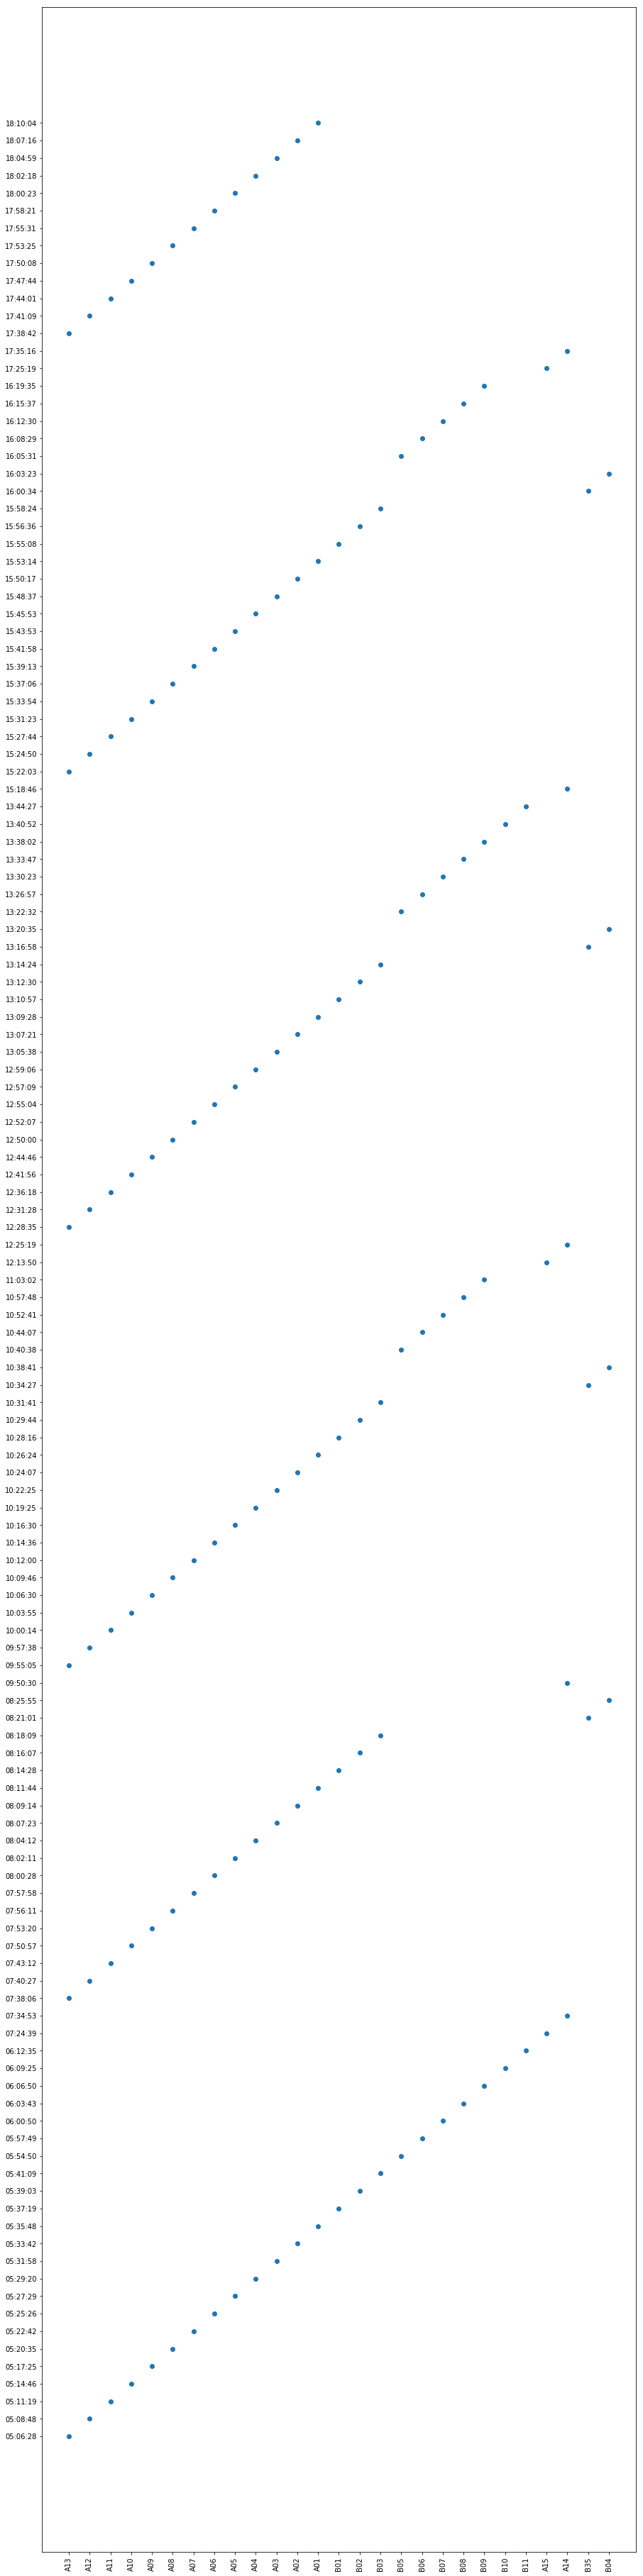

In [33]:
train22 = train22.sort_values(by='TIME')
plt.figure(figsize=(15,66))
plt.scatter(train22['STATION_ID'], train22.TIME.astype(str))
plt.xticks(rotation=90)
plt.show()

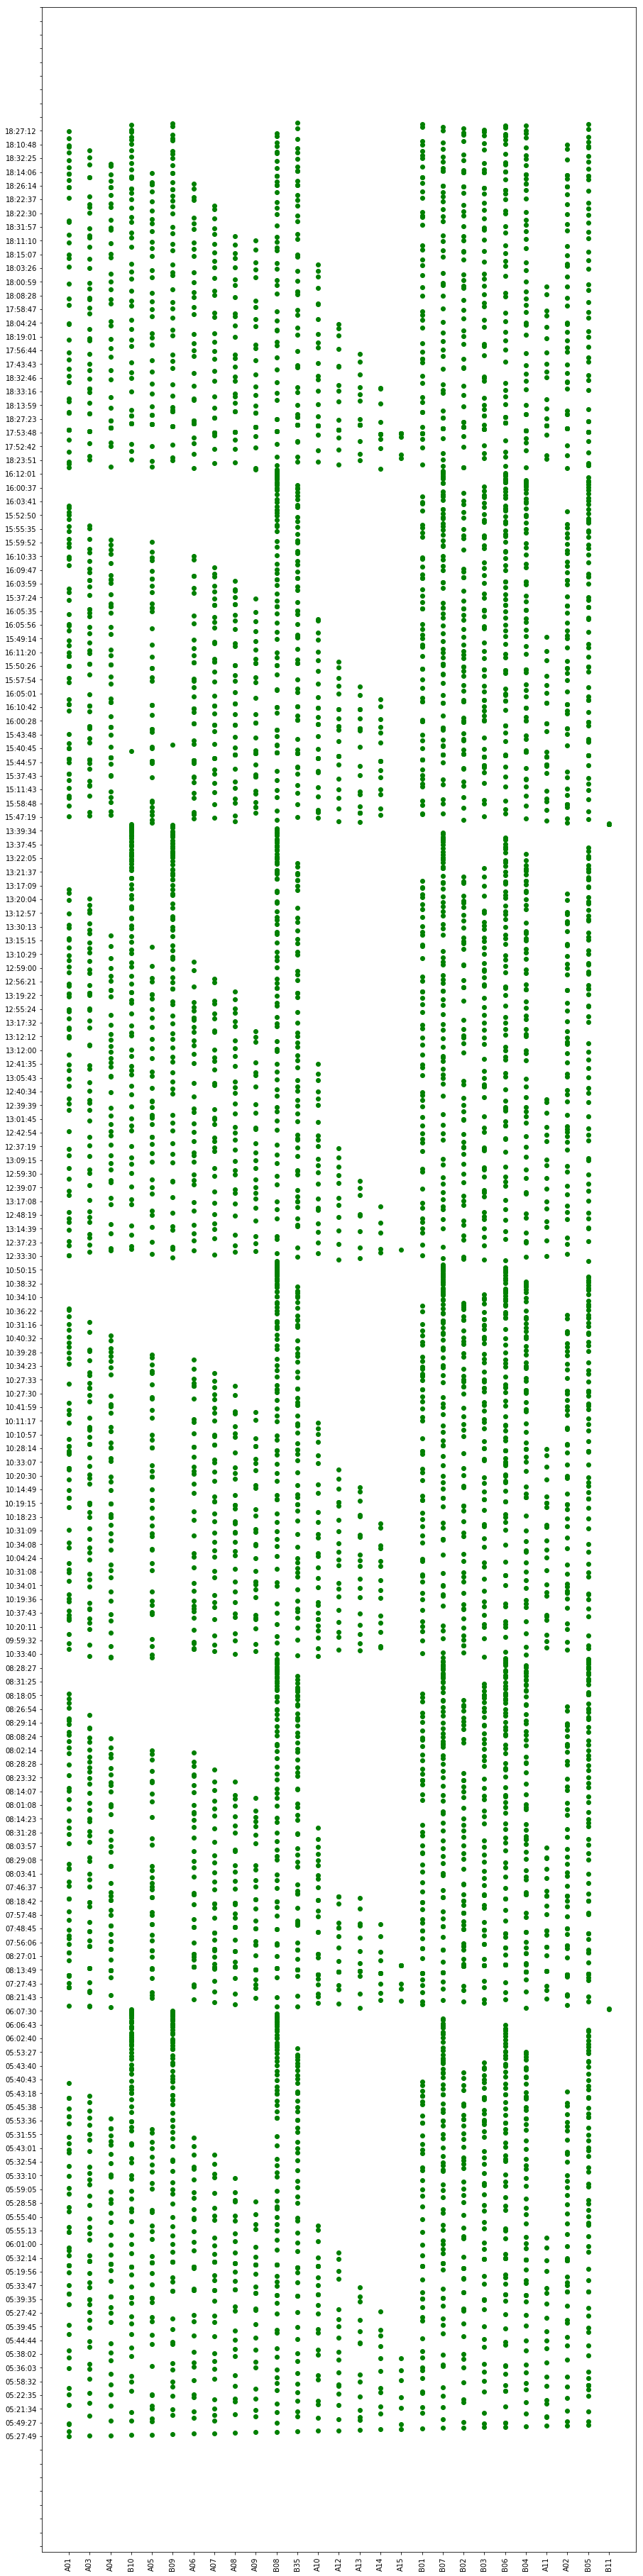

In [34]:
pred22 = pred22.sort_values(by='TIME')
plt.figure(figsize=(15,66))
ax = plt.axes()
plt.scatter(pred22['STATION_ID'], pred22.ESTIMATETIME.astype(str), color='green')
ax.yaxis.set_major_locator(plt.MaxNLocator(200))
plt.xticks(rotation=90)
plt.show()